In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from prettytable import PrettyTable

In [6]:
n=2
data = [0.414, 0.011, 0.666, -1.132, -0.410, -1.077, 1.484, -0.340, 0.789, -0.494, 0.364, -1.237, -0.044,
         -0.111, -0.210, 0.931, 0.616, -0.377, -0.433, 1.048, -0.037, 0.759, 0.609, -2.043, -2.290, 0.404,
         -0.543, 0.486, 0.869, 0.347, 2.816, -0.464, -0.632, -1.614, 0.372, -0.074, -0.916, 1.314, -0.038,
         0.673, 0.563, -0.107, 0.131, -1.808, 0.284, 0.458, 1.307, -1.625, -0.629, -0.504, -0.0056, -0.131,
         0.048, 1.879, -1.016, 0.360, -0.119, 2.331, 1.672, -1.053, 0.840, 0.246, -0.237, -1.312, 1.603, -0.952,
         -0.566, 1.600, 0.465, 1.951, 0.110, 0.251, 0.116, -0.957, -0.190, 1.479, -0.986, 1.249, 1.934, 0.070,
         -1.358, -1.246, -0.959, -1.297, -0.722, 0.925, 0.783, -0.402, 0.619, 1.826, 1.272, -0.945, 0.494, 0.050,
         -1.696, 1.876, 0.063, 0.132, 0.682, 0.544, -0.417, -0.666, -0.104, -0.253, -2.543, -1.133, 1.987, 0.668,
         0.360, 1.927, 1.183, 1.211, 1.765, 0.035, -0.359, 0.193, -1.023, -0.222, -0.616, -0.060, -1.319, -0.785,
         -0.430, -0.298, 0.248, -0.088, -1.379, 0.295, -0.115, -0.621, -0.618, 0.209, 0.979, 0.906, -0.096, -1.376,
         1.047, -0.872, -2.200, -1.384, 1.425, -0.812, 0.748, -1.095]
for i in range(4*n):
    data.pop(0)
print(data)

[0.789, -0.494, 0.364, -1.237, -0.044, -0.111, -0.21, 0.931, 0.616, -0.377, -0.433, 1.048, -0.037, 0.759, 0.609, -2.043, -2.29, 0.404, -0.543, 0.486, 0.869, 0.347, 2.816, -0.464, -0.632, -1.614, 0.372, -0.074, -0.916, 1.314, -0.038, 0.673, 0.563, -0.107, 0.131, -1.808, 0.284, 0.458, 1.307, -1.625, -0.629, -0.504, -0.0056, -0.131, 0.048, 1.879, -1.016, 0.36, -0.119, 2.331, 1.672, -1.053, 0.84, 0.246, -0.237, -1.312, 1.603, -0.952, -0.566, 1.6, 0.465, 1.951, 0.11, 0.251, 0.116, -0.957, -0.19, 1.479, -0.986, 1.249, 1.934, 0.07, -1.358, -1.246, -0.959, -1.297, -0.722, 0.925, 0.783, -0.402, 0.619, 1.826, 1.272, -0.945, 0.494, 0.05, -1.696, 1.876, 0.063, 0.132, 0.682, 0.544, -0.417, -0.666, -0.104, -0.253, -2.543, -1.133, 1.987, 0.668, 0.36, 1.927, 1.183, 1.211, 1.765, 0.035, -0.359, 0.193, -1.023, -0.222, -0.616, -0.06, -1.319, -0.785, -0.43, -0.298, 0.248, -0.088, -1.379, 0.295, -0.115, -0.621, -0.618, 0.209, 0.979, 0.906, -0.096, -1.376, 1.047, -0.872, -2.2, -1.384, 1.425, -0.812, 0.748, 

In [9]:
minX = sorted(data)[0]
maxX = sorted(data)[len(data)-1]
raz = maxX - minX
h = raz/(1+3.222*math.log(len(data)))
startX=minX-0.5*h

print("Минимальное ", minX)
print("Максимальное ", maxX)
print("Размер варьирования ", raz)
print("Частичный интервал ", h)
print("Начало интервала ", startX)

Минимальное  -2.543
Максимальное  2.816
Размер варьирования  5.359
Частичный интервал  0.3184464700737984
Начало интервала  -2.7022232350368993


In [31]:
prT = PrettyTable()
prT.field_names=['ID','Диапазон','Частость','Частота','f(x)','F(x)']
fx = 0
Fx = 0
xS = float('%.3f'%startX)
xK = xS + h
xK = float('%.3f'%xK)
pi = 0
ni = 0
id = 0
while (xK<=maxX):  
    if (xK+h>maxX):
        xK = maxX         
    ni = 0
    pi = 0
    for i in range(len(data)-1):
        if ((data[i] >= xS) and (data[i] <= xK)):
            ni+=1
    pi = ni/len(data)
    pi = float('%.3f'%pi)
    fx = pi/h
    fx = float('%.3f'%fx)
    Fx = float('%.3f'%Fx)
    temp = f"{xS}/{xK}"
    prT.add_row([id,temp,ni,pi,fx,Fx])
    Fx += pi
    id+=1
    xS = xK
    xK += h
    xK = float('%.3f'%xK)

prT

ID,Диапазон,Частость,Частота,f(x),F(x)
0,-2.702/-2.384,1,0.007,0.022,0.0
1,-2.384/-2.066,2,0.015,0.047,0.007
2,-2.066/-1.748,2,0.015,0.047,0.022
3,-1.748/-1.43,3,0.022,0.069,0.037
4,-1.43/-1.112,10,0.074,0.232,0.059
5,-1.112/-0.794,11,0.081,0.254,0.133
6,-0.794/-0.476,12,0.088,0.276,0.214
7,-0.476/-0.158,13,0.096,0.301,0.302
8,-0.158/0.16,23,0.169,0.531,0.398
9,0.16/0.478,15,0.11,0.345,0.567


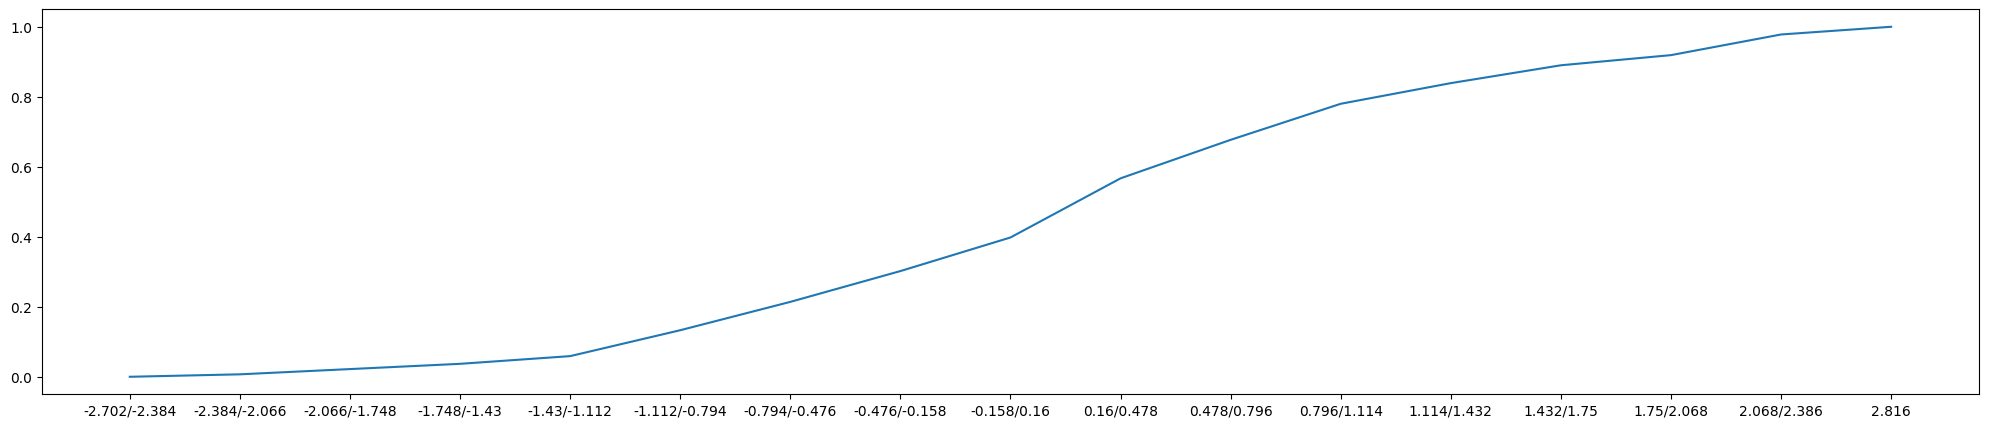

In [38]:
StartCol = []
FCol = []

for i in range(id-1):
    StartCol.append(prT.rows[i][1])
    FCol.append(prT.rows[i][5])
StartCol.append(maxX)
FCol.append(1)

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot()
ax.plot(StartCol, FCol)
plt.show()